In [3]:
import json
import lightgbm as lgb
import pandas as pd
import scipy.io as scio
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8
#plt.rcParams['xtick.color'] = 'w'
#plt.rcParams['ytick.color'] = 'w'

# data load

In [4]:
data_path = r"../data/data.mat"
print("load data")
data = scio.loadmat(data_path)

datainptrain = data['datainptrain']
dataouttrain = data['dataouttrain']
datainptest = data['datainptest']
dataouttest = data['dataouttest']

'''
X_train = datainptrain
y_train = dataouttrain
X_test = datainptest
y_test = dataouttest

'''
X_test = datainptrain
y_test = dataouttrain
X_train = datainptest
y_train = dataouttest

load data


In [5]:
print('X_train.shape: ',X_train.shape)
print('y_train.shape: ',y_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_test.shape: ',y_test.shape)

X_train.shape:  (4165, 19)
y_train.shape:  (4165, 5)
X_test.shape:  (830, 19)
y_test.shape:  (830, 5)


In [6]:
'''
#转换成dataframe
X_train = pd.DataFrame(X_train)
X_train = pd.DataFrame(X_train)
X_train = pd.DataFrame(X_train)
X_train = pd.DataFrame(X_train)
'''


'\n#转换成dataframe\nX_train = pd.DataFrame(X_train)\nX_train = pd.DataFrame(X_train)\nX_train = pd.DataFrame(X_train)\nX_train = pd.DataFrame(X_train)\n'

# model fit and predict

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, roc_curve, auc

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9997599039615847 0.9951807228915662


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [12]:
print(accuracy_score(y_test,y_pred))

0.9951807228915662


# learning curve

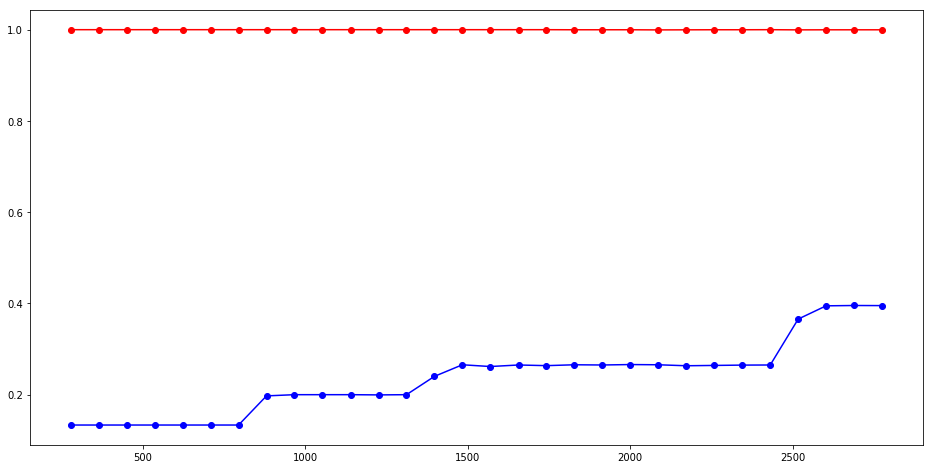

In [13]:
lc_x, lc_train, lc_test = learning_curve(model, X_train,y_train,train_sizes=np.linspace(0.1,1,30))
lc_train = np.mean(lc_train,axis=1)
lc_test = np.mean(lc_test,axis=1)
plt.figure()
plt.plot(lc_x,lc_train,'o-',color='red')
plt.plot(lc_x,lc_test,'o-',color='blue')

# prediction error varies with training sample number 

In [ ]:
acc = [list() for i in range(X_train.shape[0])]
for num_train in range(1,X_train.shape[0]+1,1):
    X_train_new = X_train[:num_train]
    y_train_new = y_train[:num_train]
    model.fit(X_train_new,y_train_new)
    acc[num_train-1] = model.score(X_test,y_test)

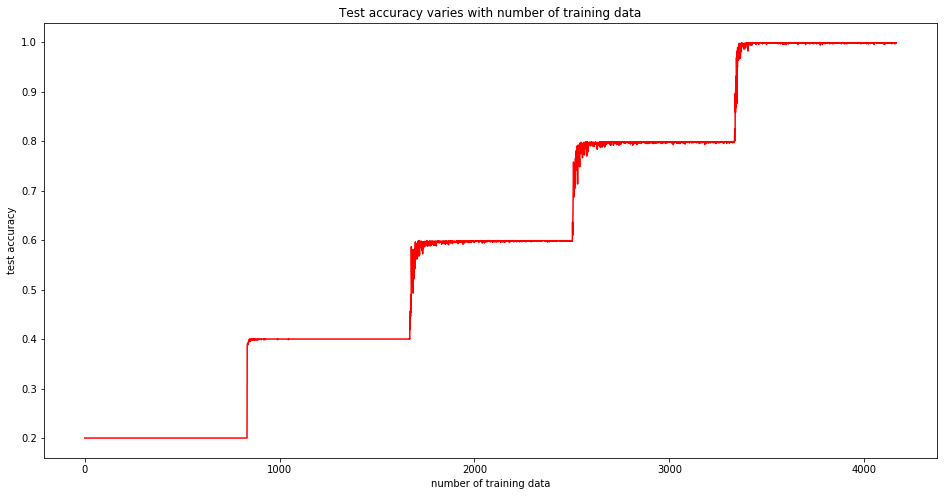

In [19]:
plt.figure()
plt.rcParams['figure.figsize'] = 16,8
num_train_xaxis = np.arange(X_train.shape[0])
plt.title('Test accuracy varies with number of training data')
plt.xlabel('number of training data')
plt.ylabel('test accuracy')
plt.plot(num_train_xaxis,acc,color='red')
plt.savefig('1.png')
plt.show()

# 打乱数据集

In [15]:
'''
print(X_train.shape,y_train.shape)
full_train = np.concatenate((X_train,y_train),axis=1)
print(full_train.shape)
np.random.shuffle(full_train)
X_train = full_train[:,0:19]
y_train = full_train[:,19:0]
print(X_train.shape,y_train.shape)
'''

'\nprint(X_train.shape,y_train.shape)\nfull_train = np.concatenate((X_train,y_train),axis=1)\nprint(full_train.shape)\nnp.random.shuffle(full_train)\nX_train = full_train[:,0:19]\ny_train = full_train[:,19:0]\nprint(X_train.shape,y_train.shape)\n'